# Data Wrangling and Analysis: WeRateDogs Twitter Data

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

## Gather Data

### 1. Twitter Archive Data

In [2]:
# Read in the twitter archive data file on hand
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 2. Image Predictions Data

In [4]:
# Download and save data from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(r.content)

# Read in the TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. Twitter API Data

In [7]:
consumer_key = 'OyU9I5qzttrR1cXXQuJI22jtf'
consumer_secret = 'uo6z4uHA2tpUF8POm8jln8qPxiiRMmLKQoGWqPdY8xjrYYUqAv'
access_token = '1197993742432686080-dA1Ia3TNIH9784OAr7104eQjkHpLKY'
access_secret = 'XQuYfZXSuhuNSlIybq5mJYB1lQJ9s6k6rL208SHTVYi1p'

In [8]:
# Create Twitter API object with rate limit parameters
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
# Query Twitter's API for the JSON data of each tweet in the Twitter archive
tweet_ids = twitter_archive.tweet_id.values

# Create a list for any tweets failed to be retrieved from the API
missing_tweet_list = []

# Set a code timer
start = time.time()
count = 0

# Iterate through the tweets and save the JSON data of each as a new line in a text file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print("Tweet ID {} failed.".format(tweet_id))
            missing_tweet_list.append(tweet_id)
            pass
        if count % 100 == 0:
            print("{} out of {} loops completed.".format(count,len(tweet_ids)))

end = time.time()
print("Time elapsed: {}".format(end - start))

Tweet ID 888202515573088257 failed.
Tweet ID 873697596434513921 failed.
100 out of 2356 loops completed.
Tweet ID 872668790621863937 failed.
Tweet ID 872261713294495745 failed.
Tweet ID 869988702071779329 failed.
Tweet ID 866816280283807744 failed.
Tweet ID 861769973181624320 failed.
Tweet ID 856602993587888130 failed.
200 out of 2356 loops completed.
Tweet ID 851953902622658560 failed.
Tweet ID 845459076796616705 failed.
Tweet ID 844704788403113984 failed.
Tweet ID 842892208864923648 failed.
Tweet ID 837366284874571778 failed.
Tweet ID 837012587749474308 failed.
300 out of 2356 loops completed.
Tweet ID 829374341691346946 failed.
Tweet ID 827228250799742977 failed.
400 out of 2356 loops completed.
500 out of 2356 loops completed.
Tweet ID 812747805718642688 failed.
Tweet ID 802247111496568832 failed.
600 out of 2356 loops completed.
700 out of 2356 loops completed.


Rate limit reached. Sleeping for: 629


Tweet ID 779123168116150273 failed.
Tweet ID 775096608509886464 failed.
800 out of 2356 loops completed.
Tweet ID 771004394259247104 failed.
Tweet ID 770743923962707968 failed.
Tweet ID 759566828574212096 failed.
900 out of 2356 loops completed.
Tweet ID 754011816964026368 failed.
1000 out of 2356 loops completed.
1100 out of 2356 loops completed.
1200 out of 2356 loops completed.
1300 out of 2356 loops completed.
1400 out of 2356 loops completed.
1500 out of 2356 loops completed.
1600 out of 2356 loops completed.


Rate limit reached. Sleeping for: 646


1700 out of 2356 loops completed.
Tweet ID 680055455951884288 failed.
1800 out of 2356 loops completed.
1900 out of 2356 loops completed.
2000 out of 2356 loops completed.
2100 out of 2356 loops completed.
2200 out of 2356 loops completed.
2300 out of 2356 loops completed.
Time elapsed: 1969.4041945934296


In [10]:
# Read through the retrieved JSON data in the newly made txt file
with open('tweet_json.txt', encoding = 'UTF-8') as json_file:
    
    # Create an empty dataframe with desired columns and their specific dtypes
    api_data = pd.DataFrame({'id' : pd.Series([], dtype = 'str'),
                                'favorites_count' : pd.Series([], dtype = 'int'),
                                'retweet_count' : pd.Series([], dtype = 'int')})
   
    # Iterate through each line of the file
    line = json_file.readline()    
    while line:
        data = json.loads(line)
        
        # Store desired data
        data_id = data['id']
        data_favorites = data['favorite_count']
        data_retweets = data['retweet_count']
        
        # Create dictionary for stored column values
        data_dict = {'id' : data_id,
                    'favorites_count' : data_favorites,
                    'retweet_count' : data_retweets}
        api_data = api_data.append(data_dict, ignore_index = True)
        
        # Read next line of the file
        line = json_file.readline()

In [11]:
api_data.head()

,favorites_count,id,retweet_count
0,35931,892420643555336193,7630
1,31003,892177421306343426,5643
2,23326,891815181378084864,3740
3,39219,891689557279858688,7803
4,37464,891327558926688256,8394


In [12]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorites_count    2331 non-null int64
id                 2331 non-null object
retweet_count      2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [13]:
api_data.to_csv('api_data.csv', index = False)

<br>
## Assessment <br>




In [14]:
# Read in all the gathered data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
api_data = pd.read_csv('api_data.csv')

### Notes on the twitter archive data

In [15]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

 >- There are 181 tweets in the table that are retweets.
 
 
 >- There are 78 tweets in the table that are replies.
 

 >- Each timestamp has unnecessary "+0000" at the end.
 
 
 >- Timestamp should be converted from a string to an actual timestamp data type.
 
 
 >- There are 4 columns for the dog stages (doggo, floofer, pupper, and puppo).
 
 
 


In [18]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

>- Ratings below 10 do no follow the famous rating standard from WeRateDogs. These could be from before this standard for ratings became popular or the ratings could be for something other than the dogs in these tweets.


>- There are many ratings that are extremely large and should be looked into.

In [19]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

>- Not all denominators are 10 as expected. These rows should be deleted to have a proper standard for ratings.

In [20]:
twitter_archive.duplicated().sum()

0

In [21]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
an            7
Buddy         7
Bailey        7
Toby          7
Bella         6
Koda          6
Jax           6
Jack          6
Scout         6
Oscar         6
Dave          6
Milo          6
Rusty         6
Stanley       6
Leo           6
Chester       5
           ... 
Sobe          1
Marlee        1
Rodney        1
Mollie        1
Fynn          1
Banjo         1
Harlso        1
Tripp         1
Creg          1
Lugan         1
Colin         1
Tango         1
Jomathan      1
Loomis        1
Cupid         1
Huxley        1
Tug           1
Charl         1
Bubba         1
Iroh          1
Rodman        1
Millie        1
Oddie         1
Chaz          1
Buckley       1
Biden         1
Norman        1
Rey           1
Perry         1
Emmie         1
Name: name, Length: 957,

>- Some words such as "a" or "an" are mistakenly recorded as names

### Notes on the image prediction data

In [22]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions[~image_predictions.p1_dog].shape[0]

543

>- 543 of the best predictions for the type of dog in the images are not dogs.


>- Only the best predictions for each image is needed so other unneeded rows should be deleted


>- Resulting table should be merged with the archive data.



In [26]:
image_predictions.duplicated().sum()

0

### Notes on the API data

In [27]:
api_data.head()

,favorites_count,id,retweet_count
0,35931,892420643555336193,7630
1,31003,892177421306343426,5643
2,23326,891815181378084864,3740
3,39219,891689557279858688,7803
4,37464,891327558926688256,8394


In [28]:
api_data.tail()

,favorites_count,id,retweet_count
2326,96,666049248165822465,40
2327,269,666044226329800704,130
2328,111,666033412701032449,41
2329,120,666029285002620928,42
2330,2394,666020888022790149,459


In [29]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorites_count    2331 non-null int64
id                 2331 non-null int64
retweet_count      2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [30]:
api_data.duplicated().sum()

0

>- This data should be merged with the archive data


>- Delete any rows missing the desired data from the resulting dataframe.

## Quality Issues

### archive data:



 > 1) There are 181 tweets in the table that are retweets.
 
 
 > 2) There are 78 tweets in the table that are replies.
 

 > 3) Each timestamp has unnecessary "+0000" at the end.
 
 
 > 4) Timestamp should be converted from a string to an actual timestamp data type. 
 
 
 > 5) Not all denominators are 10 as expected. These rows should be deleted to have a proper standard for ratings.
 

 > 6) There are some ratings below 10 do not follow the famous standard for dog ratings from WeRateDogs. These ratings could have been made before the standard became popular or the ratings could be for different reasons than the dogs. This account became famous for giving dogs ratings over 10 because ["they're good dogs Brent"](https://knowyourmeme.com/memes/theyre-good-dogs-brent).
 
 
 > 7) There are many ratings that are extremely large and should be looked into.
 
 
 > 8) Some words such as "a" or "an" are mistakenly recorded as names.

### image prediction data:

> 1) 543 of the best predictions for the type of dog in the images are not dogs.

## Tidiness Issues

### archive data:

 > 1) There are 4 columns for the dog stages (doggo, floofer, pupper, and puppo).
 
 

### image prediction data:

 > 1) Only the best predictions for each image is needed so other unneeded rows should be deleted.


 > 2) Columns such as **p1** should be renamed so that it is clear what data these columns hold.
 
 
 > 3) Resulting table should be merged with the archive data.


### API data:

> 1) This data should be merged with the archive data


<br>

## Cleaning

In [31]:
# Create copies of the dataframe to begin cleaning process
archive_clean = twitter_archive.copy()
images_clean = image_predictions.copy()
api_clean = api_data.copy()

## 1. Quality

**Archive Data -  1. There are 181 tweets in the table that are retweets.**

***Define***

>I need to delete all rows in the column **retweeted_status_id** that do not contain null values and then drop the columns corresponding to retweets.


***Code***

In [32]:
# set dataframe to all rows where retweeted_status_id is null
archive_clean = twitter_archive[pd.isnull(twitter_archive['retweeted_status_id'])]

# drop all columns corresponding to retweets
archive_clean = archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

***Test***

In [33]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Archive Data - 2. There are 78 tweets in the table that are replies.**

***Define***

>I need to delete all rows in the column **in_reply_to_status_id** that do not contain null values and then drop the columns corresponding to replies.

***Code***

In [34]:
# set dataframe to all rows where in_reply_to_status_id is null
archive_clean = archive_clean[pd.isnull(archive_clean['in_reply_to_status_id'])]

# drop all rows corresponding to replies
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

***Test***

In [35]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

**Archive Data - 3. Each timestamp has unnecessary "+0000" at the end.**

***Define***

>I need to use string slicing on the values of the timestamp column to get rid of the "+0000" characters.

***Code***

In [36]:
# Slice off the "+0000" characters and the space before for each value
archive_clean['timestamp'] = archive_clean['timestamp'].str[:-6]

***Test***

In [37]:
archive_clean.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

**Archive Data - 4 Timestamp should be converted from a string to an actual timestamp data type.**

***Define***

> Use the to_datatime method from pandas on the timestamp column

***Code***

In [38]:
# Convert the timestamp strings to actual timestamps
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

***Test***

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


**Archive Data - 5. Not all denominators are 10 as expected. These rows should be deleted to have a proper standard for ratings.**

***Define***

> Delete all rows from the table where the denominator is not 10.


***Code***

In [40]:
# Set dataframe to the dataframe where all denominators are 10
archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]

***Test***

In [41]:
archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

**Archive Data - 6. There are some ratings below 10 do not follow the famous standard for dog ratings from WeRateDogs.**

***Define***

> Delete all rows where the rating numerator is below 10.

***Code***

In [42]:
# Set the dataframe according to numerators 10 and above
archive_clean = archive_clean[archive_clean['rating_numerator'] >= 10]

***Test***

In [43]:
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
14       38
1776      1
420       1
75        1
27        1
26        1
Name: rating_numerator, dtype: int64

**Archive Data - 7. There are many ratings that are extremely large and should be looked into.**

***Define***

Check the the tweets with rating numerators above 15 and verify if these ratings are correct. If they are not, replace the existing numerator with the correct rating. If these are the correct ratings in the tweet, we must omit these outliers as they could skew the results of the analysis.

***Code***

In [44]:
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
14       38
1776      1
420       1
75        1
27        1
26        1
Name: rating_numerator, dtype: int64

In [45]:
# Check each tweet with the abnormally large ratings
large_ratings = [75,27,1776,26,420]

for rating in large_ratings:
    print("Rating numerator: {}".format(rating))
    print(archive_clean.query("rating_numerator == @rating")['text'])
    print(archive_clean.query("rating_numerator == @rating")['expanded_urls'])
    print()
    print()

Rating numerator: 75
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object
695    https://twitter.com/dog_rates/status/786709082...
Name: expanded_urls, dtype: object


Rating numerator: 27
763    This is Sophie. She's a Jubilant Bush Pupper. ...
Name: text, dtype: object
763    https://twitter.com/dog_rates/status/778027034...
Name: expanded_urls, dtype: object


Rating numerator: 1776
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
979    https://twitter.com/dog_rates/status/749981277...
Name: expanded_urls, dtype: object


Rating numerator: 26
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object
1712    https://twitter.com/dog_rates/status/680494726...
Name: expanded_urls, dtype: object


Rating numerator: 420
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
2074    https://twitter.com/dog_rates/status/670842764...
Name: expanded_urls, dtype: object




After looking into the tweets with these large numerators, I have found the reason there were ratings of 420 and 1776 is the fact that these numerators have a meaning behind them and are not normal ratings. The rating of 420 was also for Snoop Dogg rather than a real dog. The tweet with recording rating of 26 actually contains a rating of 11.27/10 which is an average rating for multiple dogs. This rating would not be helpful as we do not have the individual ratings of each dog. The tweet with the recorded rating of 75 actually has a rating of 9.75/10, which is less than 10 and can not be included in the data. Finally, the tweet with the recorded rating of 27 actually contains a rating of 11.27/10, which is an odd rating that does not fit well with the rest of the data. Based off of these observations, it would make more sense to omit these from the data.

In [46]:
# Reset the index of archive_clean to properly check indexes
archive_clean = archive_clean.reset_index(drop = True)
# Check index of each row with an abnormally large rating numerator
archive_clean.query("rating_numerator > 15")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
523,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
580,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
747,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1295,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
1513,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [47]:
archive_clean = archive_clean.drop([523,580,747,1295,1513])

***Test***

In [48]:
archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
14     38
Name: rating_numerator, dtype: int64

**Archive Data - 8. Some words such as "a" or "an" are mistakenly recorded as names.**

***Define***
All values that start with a letter in lower case in the **name** column will be replced with "None"

***Code***

In [49]:
# Return a series for name values that are lower case
lower_names = archive_clean.name.str.contains('^[a-z]', regex = True)
# replace these values with "None"
archive_clean.loc[lower_names, 'name'] = "None"

***Test***

In [50]:
archive_clean.name.str.contains('^[a-z]', regex = True).sum()

0

**image prediction data - 1. 543 of the best predictions for the type of dog in the images are not dogs.**

***Define***

Delete all rows from the dataframe where the best prediction for the image is not a dog.

***Code***

In [51]:
images_clean = images_clean[images_clean['p1_dog']]

***Test***

In [52]:
images_clean.shape[0] == images_clean.p1_dog.sum()

True

## 2. Tidiness

**Archive Data 1. There are 4 columns for the dog stages (doggo, floofer, pupper, and puppo).***

***Define***

We will want to melt the data in the **doggo**, **floofer**, **pupper**, and **puppo** columns into one **dog_stage** column. For the sake of our analysis, we want to include tweets where one dog is rated, as some tweets that include multiple dogs could potentially skew the results for certain data models. We must first pick out rows with multiple dog stages and delete them. Then we can construct the **dog_stage** column and drop the old columns that are not needed.

***Code***

In [53]:
# reset index of dataframe
archive_clean.reset_index(drop = True)

# create a list to sum the number of dog stages in each tweet
dog_stage_sum = []

# iterate through all rows of the dataframe to count the number of dog stages
for index,row in archive_clean.iterrows():
    count = 0
    if row['doggo'] == 'doggo':
        count += 1
    if row['floofer'] == 'floofer':
        count += 1
    if row['pupper'] == 'pupper':
        count += 1
    if row['puppo'] == 'puppo':
        count += 1
    dog_stage_sum.append(count)
    
# add list as a column to the data frame
archive_clean['dog_stage_sum'] = dog_stage_sum

# delete tweets with multiple dog stages
archive_clean = archive_clean[archive_clean['dog_stage_sum'] < 2]

In [54]:
# reset index of dataframe
archive_clean.reset_index(drop = True)

# create a list for the dog stage in each row
dog_stage = []

# iterate throuh the dataframe
for index,row in archive_clean.iterrows():
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
        continue
    elif row['floofer'] == 'floofer':
        dog_stage.append('floofer')
        continue
    elif row['pupper'] == 'pupper':
        dog_stage.append('pupper')
        continue
    elif row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        continue
    else:
        dog_stage.append('None')

#add list as a column to the dataframe
archive_clean['dog_stage'] = dog_stage

In [55]:
# delete unneeded columns
# reset the index once again
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo','dog_stage_sum'], axis = 1)
archive_clean.reset_index(drop = True)
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


*** Test ***

In [56]:
archive_clean.dog_stage.value_counts()

None       1369
pupper      181
doggo        69
puppo        22
floofer       9
Name: dog_stage, dtype: int64

**Image Prediction data - 1. Only the best predictions for each image is needed so other unneeded rows should be deleted.**

***Define***

We only need the best prediction for each image which is **p1** so we should delete all columns corresponding to the other predictions for each image. We also do not need that **p1_dog** column because we already made sure the best predictions were all dogs.

***Code***

In [57]:
# Delete unnecessary columns
images_clean = images_clean.drop(['p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1)

***Test***

In [58]:
images_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf'], dtype='object')

**Image Prediction Data - 2. Columns such as **p1** should be renamed so that it is clear what data these columns hold.**

***Define***

The **img_num**, **p1**, and **p1_conf** columns will be given clearer names.

***Code***

In [59]:
# rename the given columns
images_clean.rename(columns = {'img_num':'image_number','p1':'breed_prediction','p1_conf':'prediction_conf'}, inplace = True)

***Test***

In [60]:
images_clean.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'breed_prediction',
       'prediction_conf'],
      dtype='object')

**Image Prediction Data - 3. Resulting table should be merged with the archive data.**

***Define***

The images_clean table will be merged with the archive_clean table. Rows of the resulting dataframe missing any desired data must be deleted.

***Code***

In [61]:
master_df = pd.merge(archive_clean, images_clean, on = 'tweet_id', how = 'left')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 13 columns):
tweet_id              1650 non-null int64
timestamp             1650 non-null datetime64[ns]
source                1650 non-null object
text                  1650 non-null object
expanded_urls         1647 non-null object
rating_numerator      1650 non-null int64
rating_denominator    1650 non-null int64
name                  1650 non-null object
dog_stage             1650 non-null object
jpg_url               1220 non-null object
image_number          1220 non-null float64
breed_prediction      1220 non-null object
prediction_conf       1220 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 180.5+ KB


In [62]:
master_df = master_df.dropna()

***Test***

In [63]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 1 to 1649
Data columns (total 13 columns):
tweet_id              1220 non-null int64
timestamp             1220 non-null datetime64[ns]
source                1220 non-null object
text                  1220 non-null object
expanded_urls         1220 non-null object
rating_numerator      1220 non-null int64
rating_denominator    1220 non-null int64
name                  1220 non-null object
dog_stage             1220 non-null object
jpg_url               1220 non-null object
image_number          1220 non-null float64
breed_prediction      1220 non-null object
prediction_conf       1220 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 133.4+ KB


** API data - 1. This data should be merge with the rest of the data.**

***Define***
Merge this dataset with the master_df and delete any rows from the resulting dataframe with missing data. The **api_clean** has a column named **id** rather than **tweet_id**. This should be fixed first so the dataframes can merge successfully.

***Code***


In [64]:
# rename id column of api data
api_clean.rename(columns = {'id':'tweet_id'}, inplace = True)
# merge api_clean with master_df
master_df = pd.merge(master_df, api_clean, on = 'tweet_id', how = 'left')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1219
Data columns (total 15 columns):
tweet_id              1220 non-null int64
timestamp             1220 non-null datetime64[ns]
source                1220 non-null object
text                  1220 non-null object
expanded_urls         1220 non-null object
rating_numerator      1220 non-null int64
rating_denominator    1220 non-null int64
name                  1220 non-null object
dog_stage             1220 non-null object
jpg_url               1220 non-null object
image_number          1220 non-null float64
breed_prediction      1220 non-null object
prediction_conf       1220 non-null float64
favorites_count       1213 non-null float64
retweet_count         1213 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 152.5+ KB


In [65]:
master_df = master_df.dropna()

***Test***

In [66]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1219
Data columns (total 15 columns):
tweet_id              1213 non-null int64
timestamp             1213 non-null datetime64[ns]
source                1213 non-null object
text                  1213 non-null object
expanded_urls         1213 non-null object
rating_numerator      1213 non-null int64
rating_denominator    1213 non-null int64
name                  1213 non-null object
dog_stage             1213 non-null object
jpg_url               1213 non-null object
image_number          1213 non-null float64
breed_prediction      1213 non-null object
prediction_conf       1213 non-null float64
favorites_count       1213 non-null float64
retweet_count         1213 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 151.6+ KB


In [67]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,image_number,breed_prediction,prediction_conf,favorites_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,31003.0,5643.0
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,23326.0,3740.0
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,37464.0,8394.0
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,18884.0,2819.0
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,10966.0,1835.0


After merging, the **image_number**, **favorites_count** and **retweet_count** have float datatypes rather than int datatypes. These data types are erroneous and should be converted back

In [68]:
master_df['image_number'] = master_df['image_number'].astype(int)
master_df['favorites_count'] = master_df['favorites_count'].astype(int)
master_df['retweet_count'] = master_df['retweet_count'].astype(int)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1219
Data columns (total 15 columns):
tweet_id              1213 non-null int64
timestamp             1213 non-null datetime64[ns]
source                1213 non-null object
text                  1213 non-null object
expanded_urls         1213 non-null object
rating_numerator      1213 non-null int64
rating_denominator    1213 non-null int64
name                  1213 non-null object
dog_stage             1213 non-null object
jpg_url               1213 non-null object
image_number          1213 non-null int32
breed_prediction      1213 non-null object
prediction_conf       1213 non-null float64
favorites_count       1213 non-null int32
retweet_count         1213 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(7)
memory usage: 137.4+ KB


### Store Cleaned Data

The final clean dataframe will be stored into a CSV file: twitter_archive_master.csv

In [69]:
master_df.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analysis

In [70]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,image_number,breed_prediction,prediction_conf,favorites_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,31003,5643
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,23326,3740
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,37464,8394
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,18884,2819
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,10966,1835


### On average, which breeds of dogs account for the highest ratings?

In [71]:
# Find the top 10 breeds of dogs in terms if their ratings
top_breed_ratings = master_df.groupby('breed_prediction').mean().sort_values('rating_numerator', ascending = False)[:10]
top_breed_ratings.drop(['tweet_id','rating_denominator','image_number','prediction_conf','favorites_count','retweet_count'], axis = 1)

,rating_numerator
breed_prediction,
black-and-tan_coonhound,14.000000
Bedlington_terrier,13.500000
Afghan_hound,13.000000
Appenzeller,13.000000
Gordon_setter,12.666667
Leonberg,12.500000
Saluki,12.500000
Greater_Swiss_Mountain_dog,12.500000
briard,12.333333


This dataframe above displays the average ratings for the top 10 highest rated dog breeds. We notice that the black and tan coonhound is the highest rated dogs on average. However, this data can be very misleading since each breed of dogs is featured on the WeRateDogs account a different number of times. Next, we will look into which dog breeds were featured on this account the most.

### Which type of dogs are featured on WeRateDogs the most?

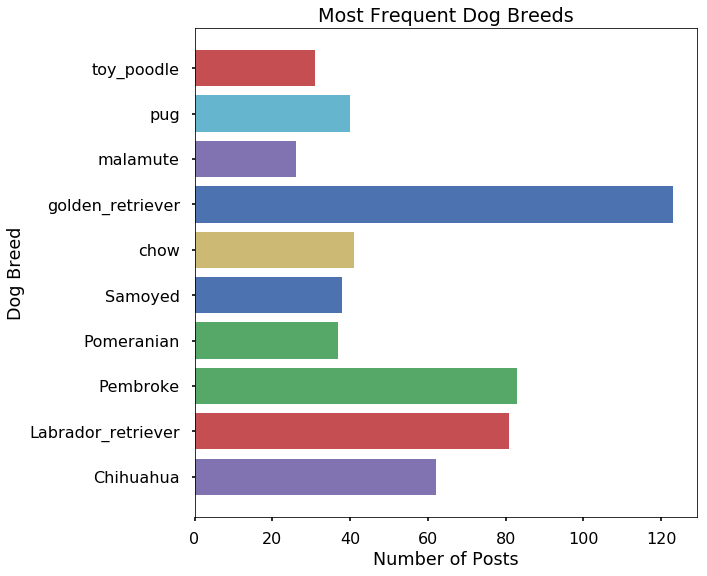

In [72]:
frequent_breeds = master_df.breed_prediction.value_counts()[:10].index
breed_counts = master_df.breed_prediction.value_counts()[:10].values
sns.set_context('poster')
plt.figure(figsize = (9,9))
plt.barh(frequent_breeds, breed_counts, color = sns.color_palette("deep"));
plt.title('Most Frequent Dog Breeds')
plt.xlabel("Number of Posts")
plt.ylabel("Dog Breed");

Interestingly enough, none of the top 10 most frequent dog breeds posted are on the top 10 highest average ratings. The fact that WeRateDogs has posted these types of dogs most often is a better indicator of their takes on dogs rather than the individual ratings themselves. We can see that golden retrievers are by far the most posted dogs on this account. It is mor important, however, to determine which types of dogs are most popular among people in general. This insight can be examined using the number of retweets and favorites for each dog breed.

## Which breeds of dogs are most populary among people?

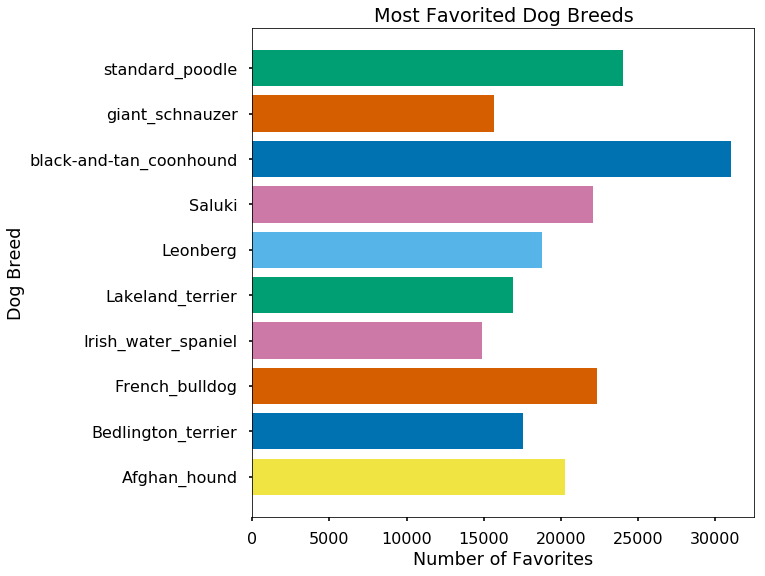

In [73]:
favorites_df = master_df.groupby("breed_prediction").mean().sort_values('favorites_count', ascending = False)[:10]
favorite_breeds = favorites_df.index
favorites_means = favorites_df.favorites_count.values
sns.set_context('poster')
plt.figure(figsize = (9,9))
plt.barh(favorite_breeds, favorites_means, color = sns.color_palette("colorblind"));
plt.title('Most Favorited Dog Breeds')
plt.xlabel("Number of Favorites")
plt.ylabel("Dog Breed");

From this graph, we notice that the black and tan coonhound is by far the most favorited dog on average. This is interesting because the black and tan coonhound also has the highest average ratings by WeRateDogs.

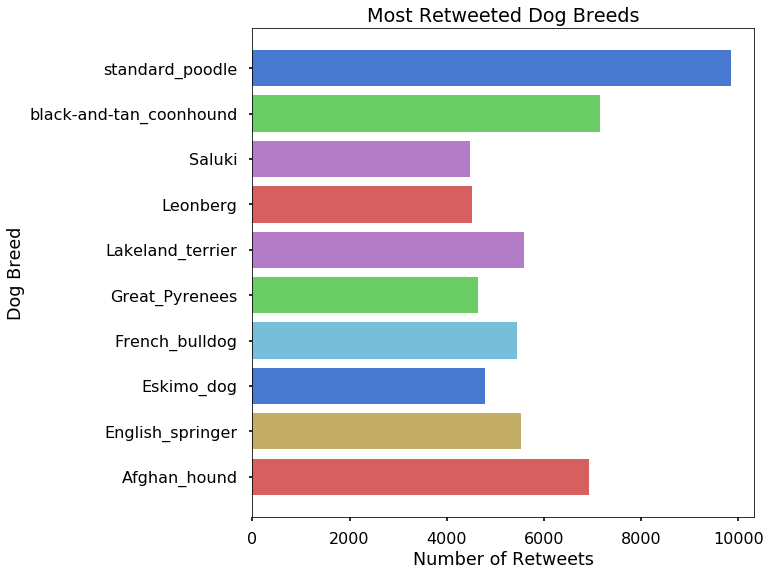

In [74]:
retweets_df = master_df.groupby("breed_prediction").mean().sort_values('retweet_count', ascending = False)[:10]
retweeted_breeds = retweets_df.index
retweet_means = retweets_df.retweet_count.values
sns.set_context('poster')
plt.figure(figsize = (9,9))
plt.barh(retweeted_breeds, retweet_means, color = sns.color_palette("muted"));
plt.title('Most Retweeted Dog Breeds')
plt.xlabel("Number of Retweets")
plt.ylabel("Dog Breed");

The top 10 most retweetd dog breeds are similar to the most favorited dog breeds, however the standar poodle is the most retweetd type of dog by far rather than the black and tan coonhound, which is second.